In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.classification.deep_learning.inceptiontime import InceptionTimeClassifier
from pathlib import Path
from stroke import Stroke
from constants import *
import os
from services.plot_confusion_matrix import plotConfusionMatrix
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from bs4 import BeautifulSoup

In [2]:
pathToTestCSV = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV/test'

In [8]:
# For validation set
strokeList = []

for subfolder in sorted(os.listdir(pathToTestCSV)):
    if subfolder in SELECTED_TRICKS:
        pathToSubFolder = os.path.join(pathToTestCSV, subfolder)
        for file in sorted(os.listdir(pathToSubFolder)):
                strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                stroke = Stroke(data=strokeData, label=subfolder, id=file)

                stroke.normalize()

                strokeList.append(stroke)

In [3]:
# For test set
strokeList = []

for file in sorted(os.listdir(pathToTestCSV)):
        strokeData = pd.read_csv(os.path.join(pathToTestCSV, file), delimiter=';', decimal='.')
        stroke = Stroke(data=strokeData, id=file)

        stroke.normalize()

        strokeList.append(stroke)

In [4]:
incepPath = Path('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/pose_estimation_classification/models/modelsinception80final.zip')
shapPath = Path('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/pose_estimation_classification/models/modelsshapelet_80final.zip')

incep = InceptionTimeClassifier.load_from_path(incepPath)
shap = ShapeletTransformClassifier.load_from_path(shapPath)

In [3]:
strokeData = pd.read_csv('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/6210165295.csv', delimiter=';', decimal='.')
stroke = Stroke(data=strokeData, id='6210165295.csv')

stroke.normalize()

In [4]:
X = np.array(stroke.data[SELECTED_FEATURES]).reshape(1, stroke.data[SELECTED_FEATURES].shape[0], stroke.data[SELECTED_FEATURES].shape[1])
X = np.nan_to_num(X)

yIncep = incep.predict_proba(X)
yShap = shap.predict_proba(X)

prod = []
for j in range(len(yIncep)):
    prod.append( yIncep[j] * yShap[j] )

stroke.predictedLabel = CLASS_TO_STROKE[np.argmax(prod)]

1/1 [==============================] - 0s 211ms/step


In [5]:
stroke.predictedLabel

'Serve Forehand Loop'

In [5]:
for s in strokeList:
    
    X = np.array(s.data[SELECTED_FEATURES]).reshape(1, s.data[SELECTED_FEATURES].shape[0], s.data[SELECTED_FEATURES].shape[1])
    X = np.nan_to_num(X)

    yIncep = incep.predict_proba(X)
    yShap = shap.predict_proba(X)

    prod = []
    for j in range(len(yIncep)):
        prod.append( yIncep[j] * yShap[j] )

    s.predictedLabel = CLASS_TO_STROKE[np.argmax(prod)]


1/1 [==============================] - 0s 10ms/step


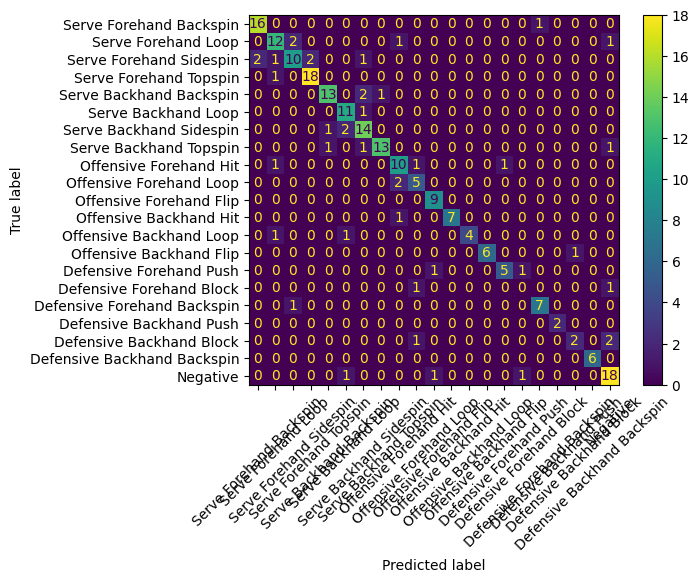

In [11]:
listeClassEncoded = [STROKE_TO_CLASS[s.label] for s in strokeList]
listePrediction = [STROKE_TO_CLASS[s.predictedLabel] for s in strokeList]
plotConfusionMatrix(listeClassEncoded, listePrediction, listClasses=STROKE_TO_CLASS)

In [12]:
somme = 0
for l in range(len(listePrediction)):
    if listePrediction[l] != listeClassEncoded[l]:
        somme += 1

print(1-somme/230)

0.817391304347826


In [6]:
import xml.etree.ElementTree as ET

In [11]:
listeClasse = [[s.predictedLabel] for s in strokeList]

In [7]:

# Charger le fichier XML
tree = ET.parse('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/test.xml')
root = tree.getroot()

# Parcourir les éléments vidéo et mettre à jour les classes
for idx, video in enumerate(root.findall('./video')):
    for video in root.findall('./video'):
        for s in strokeList:
            if s.id.replace('.csv', '.mp4') == video.get('name'):
                video.set('class', s.predictedLabel) 

# Enregistrer les modifications dans un nouveau fichier XML
tree.write('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/testFinal.xml')

In [16]:
for s in strokeList:
    print(s.id.replace('.csv', '.mp4'))

1049189921.mp4
132161617.mp4
221141194.mp4
368334412.mp4
510969106104.mp4
637143999.mp4
1885197102.mp4
245495292.mp4
4977232710.mp4
6510668999.mp4
686455376.mp4
4411610974.mp4
982836217.mp4
334756671.mp4
4107384981.mp4
52645171010.mp4
5495396310.mp4
577182641.mp4
7110484686.mp4
8579228310.mp4
9881997102.mp4
137914781.mp4
928396975.mp4
1057915434.mp4
216549866.mp4
3482106763.mp4
3561710578.mp4
39871021610.mp4
583756453.mp4
6191059351.mp4
1792107366.mp4
187313914.mp4
195510110109.mp4
2373811097.mp4
289845128.mp4
4105695299.mp4
439498463.mp4
456519819.mp4
499937754.mp4
5104662387.mp4
513472195.mp4
514583737.mp4
526935685.mp4
571928791.mp4
59109377210.mp4
6143172105.mp4
621046101044.mp4
662811676.mp4
719387315.mp4
86210471052.mp4
926253629.mp4
551223232.mp4
6462296610.mp4
6649110634.mp4
6715227110.mp4
6810534749.mp4
71043576106.mp4
91034210775.mp4
1642134105.mp4
1649210634.mp4
4510825361.mp4
6104621849.mp4
61059451074.mp4
75102109149.mp4
9101465641.mp4
9216978106.mp4
1094993785.mp4
3648910